Aim : find a relationship linking GDP and CalSuff to trade_indep (from Kummu, 2020)  - on 2000 Data

In [121]:
import pandas as pd
import numpy as np
import os

data_dir = '../../Data'

In [102]:
pd.set_option('display.max_rows', 150)

# Load data

In [2]:
import geopandas as gpd

In [122]:
data_dir = '../../Data'
df = pd.read_csv(os.path.join(data_dir,'related_datasets','Trade_GDP_CalSuff.csv')).set_index('ISO3').drop(columns=['Unnamed: 0'])
df = df.rename({'GDP_ssp1_2010':'GDP_2010'},axis=1)
df

,Calsuff_2000,Calsuff_ssp1,Calsuff_ssp2,Calsuff_ssp3,Calsuff_ssp4,Calsuff_ssp5,trade,Category,GDP_2010,GDP_ssp1,GDP_ssp2,GDP_ssp3,GDP_ssp4,GDP_ssp5,name,Trade_1998,Trade_2001,Trade_2013
ISO3,,,,,,,,,,,,,,,,,,
AFG,0.785233,0.357539,0.302060,0.285515,0.265726,0.462921,0.269311,Most vulnerable,1.185439,7.525939,4.182579,2.891351,2.616684,9.578814,Afghanistan,0.460374,0.358388,0.269311
AGO,0.597733,0.308747,0.397758,0.200725,0.310365,0.433238,0.221301,Most vulnerable,5.171680,12.157659,7.386279,4.991539,6.575093,17.175128,Angola,0.337447,0.322696,0.221301
ALB,2.319537,2.144321,2.112085,1.997762,2.156844,2.172469,0.208123,Decreasing but not as vulnerable,7.660737,23.061599,18.183380,14.094719,18.735353,28.357411,Albania,0.223349,0.197182,0.208123
ARE,0.403014,0.158618,0.152754,0.143927,0.179645,0.109497,0.000000,Importers,42.351171,79.490116,71.008454,66.454902,82.191265,100.603637,United Arab Emirates,0.000000,0.000000,0.000000
ARG,8.343864,5.579006,6.409942,6.254420,5.945893,6.103357,1.000000,Exporters,14.362739,46.757355,38.709480,27.858774,37.097542,56.844817,Argentina,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,1.306412,0.887877,1.035278,1.041431,0.920984,0.990350,0.590617,Newly vulnerable,2.844948,21.293228,15.352533,11.153305,15.721374,26.969306,Vietnam,0.596365,0.588191,0.590617
YEM,0.273570,0.148041,0.119826,0.158879,0.109572,0.147259,0.041852,Importers,2.372926,8.584981,6.566320,4.280249,3.977799,10.390752,Yemen,0.104230,0.084691,0.041852
ZAF,1.681635,1.450347,1.536092,4.146097,1.423558,1.305191,0.433191,Highly variable,9.470030,33.277364,27.540868,20.898775,27.538970,39.485362,South Africa,0.500649,0.499329,0.433191


## GDP

In [4]:
gdp_data_path = os.path.join(data_dir,'inputs','Management','GDP_SSPs_Dellink','GDP_percapita_OECD+IIASA.xlsx')
gdp_df = pd.read_excel(gdp_data_path).set_index(['Region'])
gdp_df = gdp_df[gdp_df['Model']=='OECD Env-Growth'][[2010,2050,'Scenario']]
gdp_df = gdp_df.pivot(columns='Scenario')

## Trade

In [11]:
trade_data_path = os.path.join(data_dir,'related_datasets','Import_independency','Matti_Kummu_2019','shp_trade_dep.gpkg')
trade_df = gpd.read_file(trade_data_path)
trade_df

,fao_id,admin,region_un,subregion,region_wb,id,cntry,region,yr1965,yr1968,...,yr2010,yr2013,ratio_1st,p_value_1st,ratio_2nd,p_value_2nd,country,pop1989,pop2013,geometry
0,-99,Saint Barthelemy,Americas,Caribbean,Latin America & Caribbean,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"MULTIPOLYGON (((-62.83193 17.87646, -62.86543 ..."
1,-99,Jersey,Europe,Northern Europe,Europe & Central Asia,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"MULTIPOLYGON (((-2.01865 49.23125, -2.23584 49..."
2,-99,Ashmore and Cartier Islands,Oceania,Australia and New Zealand,East Asia & Pacific,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"MULTIPOLYGON (((123.59453 -12.42568, 123.59521..."
3,-99,Siachen Glacier,Asia,Southern Asia,South Asia,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"MULTIPOLYGON (((77.79941 35.49590, 77.04863 35..."
4,-99,Indian Ocean Territories,Seven seas (open ocean),Seven seas (open ocean),East Asia & Pacific,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"MULTIPOLYGON (((105.72539 -10.49297, 105.69688..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,95,Honduras,Americas,Central America,Latin America & Caribbean,63.0,Honduras,Central America,0.620469,0.654306,...,0.439794,0.477548,0.000000,0.102,0.000000,0.129,Honduras,4814.14,8657.79,"MULTIPOLYGON (((-83.15752 14.99307, -84.64595 ..."
246,96,Hong Kong S.A.R.,Asia,Eastern Asia,East Asia & Pacific,NaN,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"China, Hong Kong SAR",5699.22,7148.57,"MULTIPOLYGON (((114.01543 22.51191, 114.26602 ..."
247,97,Hungary,Europe,Eastern Europe,Europe & Central Asia,65.0,Hungary,Eastern Europe,0.452650,0.471294,...,1.000000,1.000000,0.431181,0.000,0.226581,0.009,Hungary,10402.13,9841.70,"MULTIPOLYGON (((22.13184 48.40532, 22.87666 47..."
248,98,Croatia,Europe,Southern Europe,Europe & Central Asia,66.0,Croatia,Southern Europe,0.416804,0.470204,...,0.525851,0.488545,0.000000,0.150,0.000000,0.456,Croatia,4780.63,4277.81,"MULTIPOLYGON (((17.66758 42.89712, 18.43633 42..."


## Caloric Sufficiencies

In [9]:
calsuff_df = pd.read_csv(os.path.join(data_dir, 'related_datasets','sufficiencies_full.csv')).set_index(['ISO3'])
calsuff_df = calsuff_df[['CalSuff_2000','ssp1','ssp2','ssp3','ssp4','ssp5','trade','Category']]

## Make/Load Trade_df
with trade_index (2000, 2013) & CalSuff (2000,2050 per SSPs) & GDPs (2000,2050 per SSPs)

### Load

In [61]:
df = pd.read_csv(os.path.join(data_dir,'related_datasets','Trade_GDP_CalSuff.csv'))


### Countries names

In [7]:
countries_names = pd.read_csv(os.path.join(data_dir,'inputs','Base', 'country_names.csv'),encoding='latin-1')
countries_names

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
0,1,ABW,ABW,Aruba,Aruba,Aruba,Aruba,Aruba,Netherlands,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1533
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
3,4,AIA,AIA,Anguilla,Anguilla,Anguilla,Anguilla,Anguilla,United Kingdom,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1660
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,WSM,WSM,Samoa,Samoa,Samoa,Samoa,Samoa,Samoa,249,...,.ws,WS,SAM,882.0,685,882.0,SAM,244.0,212.0,244
250,251,YEM,YEM,Yemen,Yemen,Yemen,Yemen,Yemen,Yemen,250,...,.ye,YAR,YEM,887.0,967,887.0,YEM,249.0,269.0,249
251,252,ZAF,ZAF,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa,251,...,.za,ZA,RSA,710.0,27,710.0,SAF,202.0,227.0,202
252,253,ZMB,ZMB,Zambia,Zambia,Zambia,Zambia,Zambia,Zambia,252,...,.zm,RNR,ZAM,894.0,260,894.0,ZAM,251.0,270.0,251


### Build trade_df

In [12]:
# Merge countries names + trade_df
trade_df = trade_df.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')

# Merge calsuff with GDPs
suff_df = calsuff_df.join(gdp_df)
suff_df=suff_df.rename(
    {(2010, 'SSP1'): 'GDP_ssp1_2010',(2050, 'SSP1'): 'GDP_ssp1',(2050, 'SSP2'): 'GDP_ssp2',
     (2050, 'SSP3'): 'GDP_ssp3',(2050, 'SSP4'): 'GDP_ssp4',(2050, 'SSP5'): 'GDP_ssp5',
    'CalSuff_2000':'Calsuff_2000','ssp1':'Calsuff_ssp1','ssp2':'Calsuff_ssp2','ssp3':'Calsuff_ssp3',
     'ssp4':'Calsuff_ssp4','ssp5':'Calsuff_ssp5'},axis=1).drop(columns=[(2010, 'SSP2'),
                                        (2010, 'SSP3'),(2010, 'SSP4'),(2010, 'SSP5')])

# Merge all
suff_df = suff_df.merge(trade_df[['name','ISO3','yr1998', 'yr2001','yr2013']], on='ISO3').rename(
    {'yr2013': 'Trade_2013','yr2001': 'Trade_2001','yr1998': 'Trade_1998'}, axis=1)
suff_df

/Users/charlotteweil1/anaconda3/envs/carbon/lib/python3.8/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,ISO3,Calsuff_2000,Calsuff_ssp1,Calsuff_ssp2,Calsuff_ssp3,Calsuff_ssp4,Calsuff_ssp5,trade,Category,GDP_ssp1_2010,GDP_ssp1,GDP_ssp2,GDP_ssp3,GDP_ssp4,GDP_ssp5,name,Trade_1998,Trade_2001,Trade_2013
0,AFG,0.785233,0.357539,0.302060,0.285515,0.265726,0.462921,0.269311,Most vulnerable,1.185439,7.525939,4.182579,2.891351,2.616684,9.578814,Afghanistan,0.460374,0.358388,0.269311
1,AGO,0.597733,0.308747,0.397758,0.200725,0.310365,0.433238,0.221301,Most vulnerable,5.171680,12.157659,7.386279,4.991539,6.575093,17.175128,Angola,0.337447,0.322696,0.221301
2,ALB,2.319537,2.144321,2.112085,1.997762,2.156844,2.172469,0.208123,Decreasing but not as vulnerable,7.660737,23.061599,18.183380,14.094719,18.735353,28.357411,Albania,0.223349,0.197182,0.208123
3,ARE,0.403014,0.158618,0.152754,0.143927,0.179645,0.109497,0.000000,Importers,42.351171,79.490116,71.008454,66.454902,82.191265,100.603637,United Arab Emirates,0.000000,0.000000,0.000000
4,ARG,8.343864,5.579006,6.409942,6.254420,5.945893,6.103357,1.000000,Exporters,14.362739,46.757355,38.709480,27.858774,37.097542,56.844817,Argentina,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,VNM,1.306412,0.887877,1.035278,1.041431,0.920984,0.990350,0.590617,Newly vulnerable,2.844948,21.293228,15.352533,11.153305,15.721374,26.969306,Vietnam,0.596365,0.588191,0.590617
156,YEM,0.273570,0.148041,0.119826,0.158879,0.109572,0.147259,0.041852,Importers,2.372926,8.584981,6.566320,4.280249,3.977799,10.390752,Yemen,0.104230,0.084691,0.041852
157,ZAF,1.681635,1.450347,1.536092,4.146097,1.423558,1.305191,0.433191,Highly variable,9.470030,33.277364,27.540868,20.898775,27.538970,39.485362,South Africa,0.500649,0.499329,0.433191
158,ZMB,2.483866,0.935240,1.022753,1.550791,0.922021,1.166550,0.577964,Newly vulnerable,1.383757,13.153121,7.848492,4.592857,3.938140,17.327971,Zambia,0.444734,0.478473,0.577964


In [13]:
suff_df.to_csv(os.path.join(data_dir,'related_datasets','Trade_GDP_CalSuff.csv'))

# Exploratory

In [125]:
df['log_GDP_2010'] = df['GDP_2010'].apply(lambda x:np.log(x))
df = df.dropna()

/Users/charlotteweil1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## Plots Bokeh

In [5]:
import bokeh

In [6]:
from bokeh.plotting import figure, output_file
from bokeh.io import output_notebook, show, export_png, export_svgs
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.models.tools import HoverTool
from bokeh import palettes
from bokeh.transform import linear_cmap
import bokeh.models as bmo
import matplotlib.pyplot as plt


output_notebook() #Magic to Bokeh into nb

Loading BokehJS ...

In [12]:
p = figure()

source = ColumnDataSource(df)

p.scatter(x='Calsuff_2000', y='log_GDP_2010',source=source,
          color=linear_cmap('Trade_2001', "Plasma10", 1, 0),
              size=10)
p.title.text = 'Trade index vs. CalSuff and log GDP'
p.xaxis.axis_label = 'Cal Suff'
p.yaxis.axis_label = 'log GDP '
    
hover = HoverTool()
hover.tooltips=[
    ('Country','@name'),
    ('Trade index', '@Trade_2001'),
    ('Cal Suff', '@Calsuff_2000'),
    ('GDP', '@GDP_2010'),
    ('Cat','@Category')
]

p.add_tools(hover)
p.legend.location = "bottom_left"

show(p)

In [11]:
p = figure()

source = ColumnDataSource(df)

p.scatter(x='Calsuff_2000', y='Trade_2001',source=source,
          color=linear_cmap('GDP_2010', "Plasma10", 50, -10),
              size=7)
p.title.text = 'Trade index 2001'
p.xaxis.axis_label = 'Cal Suff'
p.yaxis.axis_label = 'Trade index'
    
hover = HoverTool()
hover.tooltips=[
    ('Country','@name'),
    ('GDP', '@GDP_2010')
]

p.add_tools(hover)
p.legend.location = "bottom_left"

show(p)

In [99]:
p = figure()

source = ColumnDataSource(df)

p.scatter(x='log_GDP_2010', y='Trade_2001',source=source,
          color=linear_cmap('Calsuff_2000', "YlGnBu9", 5, -2),
              size=10)
p.title.text = 'Trade index 2001'
p.xaxis.axis_label = 'Log GDP'
p.yaxis.axis_label = 'Trade index'
    
hover = HoverTool()
hover.tooltips=[
    ('Country','@name'),
    ('CalSuff', '@Calsuff_2000')
]

p.add_tools(hover)
p.legend.location = "bottom_left"

show(p)

# Modeling iterations

In [120]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [123]:
df=df.dropna()

In [17]:
X = df[['Calsuff_2000','GDP_2010','log_GDP_2010']]  
y = df['Trade_2001'] 
# Should train/test split !
lm = LinearRegression()  
lm.fit(X, y) 
y_pred= lm.predict(X) 


r2_score(y,y_pred)

0.3957627359423316

In [128]:
X = df[['Calsuff_2000','log_GDP_2010']]  
y = df['Trade_2001'] 
# Should train/test split !
lm = Lasso(alpha=0.0001)
lm.fit(X, y) 
y_pred= lm.predict(X) 


r2_score(y,y_pred)

0.3941309699350237

In [123]:
X = df[['Calsuff_2000','log_GDP_2010']]  
y = df['Trade_2001'] 
# Should train/test split !
lm = Ridge(alpha=0.0001)
lm.fit(X, y) 
y_pred= lm.predict(X) 


r2_score(y,y_pred)

0.3941311572145543

In [16]:
X = df[['Calsuff_2000','log_GDP_2010']]
y = df['Trade_2001']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred= model.predict(X_test) 

r2_score(y_test,y_pred)

0.353060088350338

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
X = df[['Calsuff_2000','log_GDP_2010']]
y = df['Trade_2001']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeRegressor(random_state=2)
model.fit(X_train, y_train) 
y_pred= model.predict(X_test) 

r2_score(y_test,y_pred)

-0.2654679764496428

# Even simpler Modeling

In [ ]:
Just categories to model trade_indep 2000.

Maybe the model can simply be:
Define exporters #Exporters:
if CalSuff > 4
#Importers:
if CalSuff < 1-1.5 and log GDP > 75th percentile of log GDP of all countries that year

# Project trade_indep 2050 & Compare to trade 2013

## As Classification problem

### Train classifier

In [144]:
def trade_cat(trade_indep):
    if trade_indep > 0.8:
        return 'Exporter'
    elif trade_indep < 0.2:
        return 'Importer'
    else:
        return 'Medium'
    
df['Trade_cat_2001'] = df['Trade_2001'].apply(lambda x:trade_cat(x))
df['Trade_cat_2013'] = df['Trade_2013'].apply(lambda x:trade_cat(x))

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [151]:
X = df[['Calsuff_2000','log_GDP_2010']]
y = df['Trade_cat_2001']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 
y_pred= model.predict(X_test) 

In [156]:
print(classification_report(y_test, y_pred, target_names=['Exporter','Importer','Medium',]))

              precision    recall  f1-score   support

    Exporter       0.50      0.33      0.40         6
    Importer       0.57      0.40      0.47        10
      Medium       0.70      0.82      0.75        28

    accuracy                           0.66        44
   macro avg       0.59      0.52      0.54        44
weighted avg       0.64      0.66      0.64        44



In [150]:
# Not very good ...

ISO3
AUT      Medium
MMR      Medium
NER      Medium
CMR      Medium
PRY    Exporter
TKM      Medium
IDN      Medium
CAN    Exporter
TLS      Medium
BLZ    Exporter
THA    Exporter
SVK      Medium
ESP    Importer
GAB      Medium
GUY    Exporter
DEU      Medium
CHL      Medium
AZE      Medium
TJK      Medium
GNB      Medium
MEX    Importer
SEN      Medium
DZA    Importer
NAM      Medium
FIN      Medium
SAU    Importer
IRQ    Importer
YEM    Importer
NOR    Importer
BRA      Medium
KGZ      Medium
COG      Medium
ZAF      Medium
ALB    Importer
IND      Medium
BEN      Medium
LBN    Importer
PAN      Medium
HRV      Medium
POL      Medium
IRL      Medium
FRA    Exporter
JAM    Importer
RUS      Medium
Name: Trade_cat_2001, dtype: object

### Predict and map

In [157]:
for i in np.arange(1,6):
    df['log_GDP_ssp'+str(i)] = df['GDP_ssp'+str(i)].apply(lambda x:np.log(x))
    
for i in np.arange(1,6):
    df['Trade_cat_predicted_ssp'+str(i)] = model.predict(df[['Calsuff_ssp'+str(i),'log_GDP_ssp'+str(i)]])
    
df['Trade_cat_predicted_2001'] = model.predict(df[['Calsuff_2000','log_GDP_2010']])

In [168]:
import geopandas
import matplotlib.pyplot as plt
import matplotlib.colors
#import geoplot

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.set_index("iso_a3").merge(df)


In [ ]:
# Colormap
levels = [-0.01,0.01, 0.2, 0.4, 0.6, 0.8, 0.99,1.01]
colors = ['pink','#dadaeb', '#9e9ac8', '#756bb1', '#54278f','#3f007d','black']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)


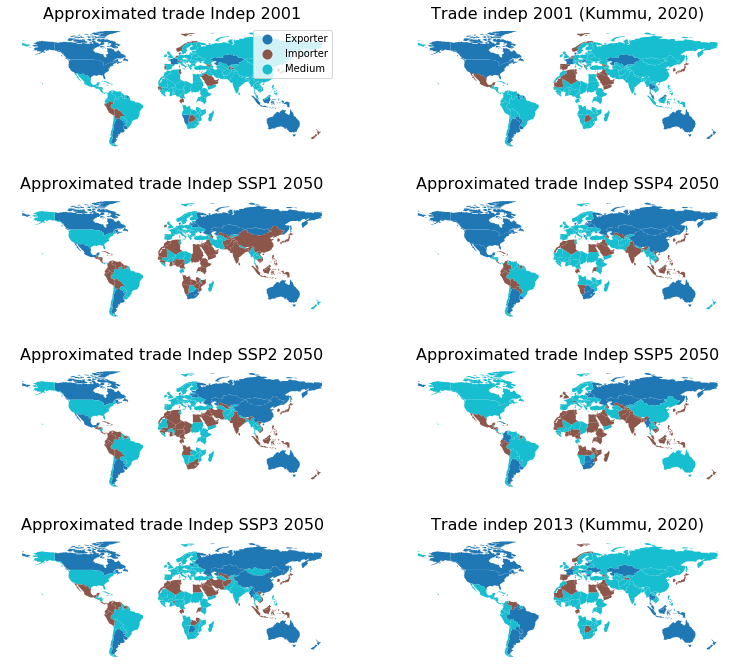

In [179]:
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(13, 12))

world.plot(column='Trade_cat_predicted_2001', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[0,0],
          legend=True, )#, edgecolor=’0.8')
axes[0,0].set_title('Approximated trade Indep 2001', fontdict={'fontsize':'16'});
axes[0,0].axis('off');

world.plot(column='Trade_cat_2001', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[0,1])#, edgecolor=’0.8')
axes[0,1].set_title('Trade indep 2001 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[0,1].axis('off');

world.plot(column='Trade_cat_predicted_ssp1', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[1,0])#, edgecolor=’0.8')
axes[1,0].set_title('Approximated trade Indep SSP1 2050', fontdict={'fontsize':'16'});
axes[1,0].axis('off');

world.plot(column='Trade_cat_predicted_ssp2', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[2,0])#, edgecolor=’0.8')
axes[2,0].set_title('Approximated trade Indep SSP2 2050', fontdict={'fontsize':'16'});
axes[2,0].axis('off');

world.plot(column='Trade_cat_predicted_ssp3', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[3,0])#, edgecolor=’0.8')
axes[3,0].set_title('Approximated trade Indep SSP3 2050', fontdict={'fontsize':'16'});
axes[3,0].axis('off');


world.plot(column='Trade_cat_predicted_ssp4', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[1,1])#, edgecolor=’0.8')
axes[1,1].set_title('Approximated trade Indep SSP4 2050', fontdict={'fontsize':'16'});
axes[1,1].axis('off');

world.plot(column='Trade_cat_predicted_ssp5', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[2,1])#, edgecolor=’0.8')
axes[2,1].set_title('Approximated trade Indep SSP5 2050', fontdict={'fontsize':'16'});
axes[2,1].axis('off');

world.plot(column='Trade_cat_2013', categorical=True, cmap='tab10',  linewidth=0.8, ax=axes[3,1])#, edgecolor=’0.8')
axes[3,1].set_title('Trade indep 2013 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[3,1].axis('off');

## with model = LinearRegression() 

In [126]:
X = df[['Calsuff_2000','log_GDP_2010']]
y = df['Trade_2001']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred= model.predict(X_test) 

r2_score(y_test,y_pred)

0.353060088350338

In [127]:
for i in np.arange(1,6):
    df['log_GDP_ssp'+str(i)] = df['GDP_ssp'+str(i)].apply(lambda x:np.log(x))

In [128]:
for i in np.arange(1,6):
    df['Trade_lm_predicted_ssp'+str(i)] = model.predict(df[['Calsuff_ssp'+str(i),'log_GDP_ssp'+str(i)]])

In [129]:
df['Trade_lm_predicted_2001'] = model.predict(df[['Calsuff_2000','log_GDP_2010']])

In [133]:
df.columns

Index(['Calsuff_2000', 'Calsuff_ssp1', 'Calsuff_ssp2', 'Calsuff_ssp3',
       'Calsuff_ssp4', 'Calsuff_ssp5', 'trade', 'Category', 'GDP_2010',
       'GDP_ssp1', 'GDP_ssp2', 'GDP_ssp3', 'GDP_ssp4', 'GDP_ssp5', 'name',
       'Trade_1998', 'Trade_2001', 'Trade_2013', 'log_GDP_2010',
       'log_GDP_ssp1', 'log_GDP_ssp2', 'log_GDP_ssp3', 'log_GDP_ssp4',
       'log_GDP_ssp5', 'Trade_lm_predicted_ssp1', 'Trade_lm_predicted_ssp2',
       'Trade_lm_predicted_ssp3', 'Trade_lm_predicted_ssp4',
       'Trade_lm_predicted_ssp5', 'Trade_lm_predicted_2001'],
      dtype='object')

In [31]:
df.to_csv(os.path.join(data_dir,'temp','lm_trade_rez.csv'))

### Map

In [130]:
import geopandas
import matplotlib.pyplot as plt
import matplotlib.colors
#import geoplot

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.set_index("iso_a3").merge(df)


In [139]:
# Colormap
levels = [-0.01,0.01, 0.2, 0.4, 0.6, 0.8, 0.99,1.01]
colors = ['pink','#dadaeb', '#9e9ac8', '#756bb1', '#54278f','#3f007d','black']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)


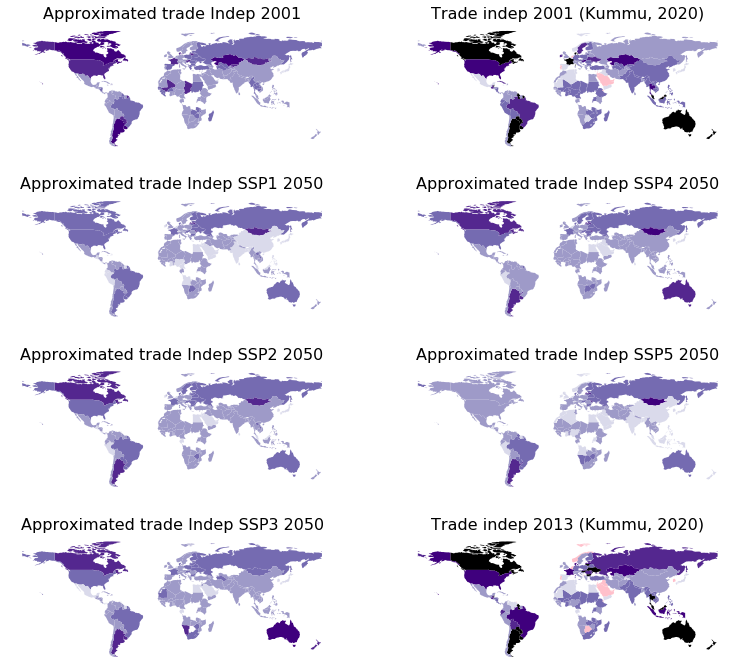

In [166]:
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(13, 12))

world.plot(column='Trade_lm_predicted_2001', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,0])#, edgecolor=’0.8')
axes[0,0].set_title('Approximated trade Indep 2001', fontdict={'fontsize':'16'});
axes[0,0].axis('off');

world.plot(column='Trade_2001', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,1])#, edgecolor=’0.8')
axes[0,1].set_title('Trade indep 2001 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[0,1].axis('off');

world.plot(column='Trade_lm_predicted_ssp1', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,0])#, edgecolor=’0.8')
axes[1,0].set_title('Approximated trade Indep SSP1 2050', fontdict={'fontsize':'16'});
axes[1,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp2', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,0])#, edgecolor=’0.8')
axes[2,0].set_title('Approximated trade Indep SSP2 2050', fontdict={'fontsize':'16'});
axes[2,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp3', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[3,0])#, edgecolor=’0.8')
axes[3,0].set_title('Approximated trade Indep SSP3 2050', fontdict={'fontsize':'16'});
axes[3,0].axis('off');


world.plot(column='Trade_lm_predicted_ssp4', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,1])#, edgecolor=’0.8')
axes[1,1].set_title('Approximated trade Indep SSP4 2050', fontdict={'fontsize':'16'});
axes[1,1].axis('off');

world.plot(column='Trade_lm_predicted_ssp5', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,1])#, edgecolor=’0.8')
axes[2,1].set_title('Approximated trade Indep SSP5 2050', fontdict={'fontsize':'16'});
axes[2,1].axis('off');

world.plot(column='Trade_2013', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[3,1])#, edgecolor=’0.8')
axes[3,1].set_title('Trade indep 2013 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[3,1].axis('off');

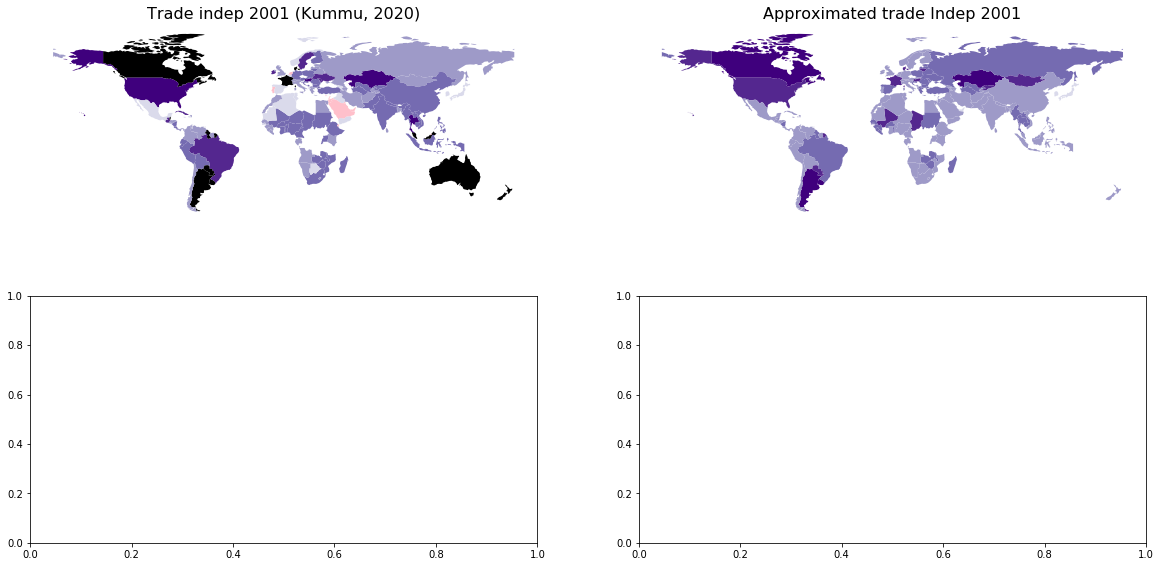

In [140]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20, 10))

world.plot(column='Trade_lm_predicted_2001', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,1])#, edgecolor=’0.8')
axes[0,1].set_title('Approximated trade Indep 2001', fontdict={'fontsize':'16'});
axes[0,1].axis('off');

world.plot(column='Trade_2001', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,0])#, edgecolor=’0.8')
axes[0,0].set_title('Trade indep 2001 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[0,0].axis('off');

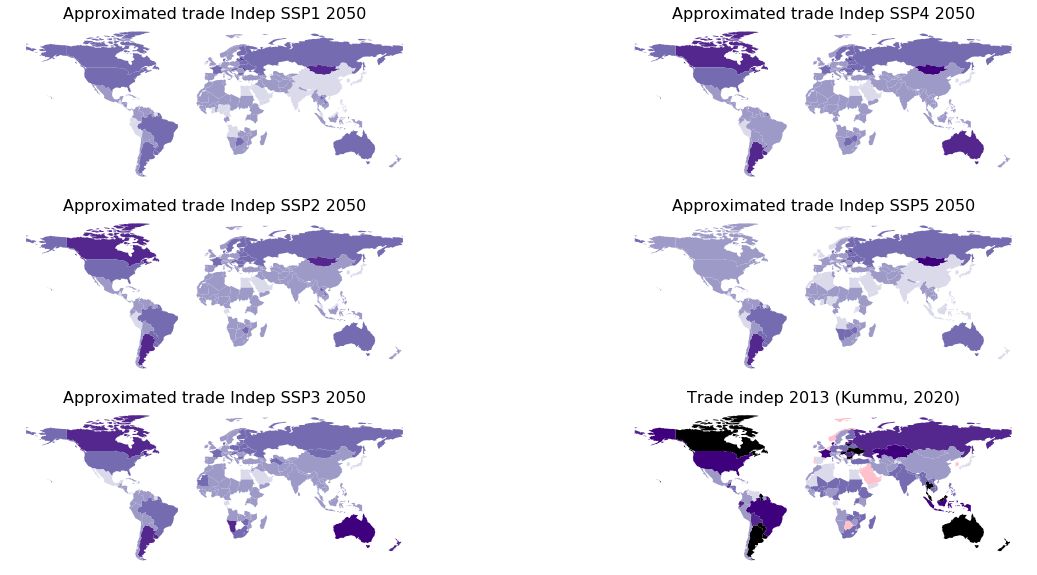

In [141]:
# Map predicted Trade 2050 and Trade 2013.

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20, 10))

world.plot(column='Trade_lm_predicted_ssp1', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,0])#, edgecolor=’0.8')
axes[0,0].set_title('Approximated trade Indep SSP1 2050', fontdict={'fontsize':'16'});
axes[0,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp2', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,0])#, edgecolor=’0.8')
axes[1,0].set_title('Approximated trade Indep SSP2 2050', fontdict={'fontsize':'16'});
axes[1,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp3', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,0])#, edgecolor=’0.8')
axes[2,0].set_title('Approximated trade Indep SSP3 2050', fontdict={'fontsize':'16'});
axes[2,0].axis('off');


world.plot(column='Trade_lm_predicted_ssp4', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,1])#, edgecolor=’0.8')
axes[0,1].set_title('Approximated trade Indep SSP4 2050', fontdict={'fontsize':'16'});
axes[0,1].axis('off');

world.plot(column='Trade_lm_predicted_ssp5', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,1])#, edgecolor=’0.8')
axes[1,1].set_title('Approximated trade Indep SSP5 2050', fontdict={'fontsize':'16'});
axes[1,1].axis('off');

world.plot(column='Trade_2013', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,1])#, edgecolor=’0.8')
axes[2,1].set_title('Trade indep 2013 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[2,1].axis('off');

# Wip

## with model = LinearRegression()

In [13]:
df = pd.read_csv(os.path.join(data_dir,'temp','lm_trade_rez.csv')).set_index('ISO3')

In [119]:
df.columns

Index(['Calsuff_2000', 'Calsuff_ssp1', 'Calsuff_ssp2', 'Calsuff_ssp3',
       'Calsuff_ssp4', 'Calsuff_ssp5', 'trade', 'Category', 'GDP_2010',
       'GDP_ssp1', 'GDP_ssp2', 'GDP_ssp3', 'GDP_ssp4', 'GDP_ssp5', 'name',
       'Trade_1998', 'Trade_2001', 'Trade_2013', 'log_GDP_2010',
       'log_GDP_ssp1', 'log_GDP_ssp2', 'log_GDP_ssp3', 'log_GDP_ssp4',
       'log_GDP_ssp5', 'Trade_lm_predicted_ssp5', 'Trade_lm_predicted_ssp1',
       'Trade_lm_predicted_ssp2', 'Trade_lm_predicted_ssp3',
       'Trade_lm_predicted_ssp4'],
      dtype='object')

In [80]:
world

,pop_est,continent,name,gdp_md_est,geometry,Calsuff_2000,Calsuff_ssp1,Calsuff_ssp2,Calsuff_ssp3,Calsuff_ssp4,...,log_GDP_ssp1,log_GDP_ssp2,log_GDP_ssp3,log_GDP_ssp4,log_GDP_ssp5,Trade_lm_predicted_ssp5,Trade_lm_predicted_ssp1,Trade_lm_predicted_ssp2,Trade_lm_predicted_ssp3,Trade_lm_predicted_ssp4
0,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",9.838988,4.629821,6.664350,7.424824,7.910551,...,4.002226,4.018808,4.107603,4.093761,4.265018,0.387416,0.497728,0.677612,0.740411,0.784314
1,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",5.963544,3.928815,3.972290,4.226413,4.752489,...,4.323253,4.216767,4.208216,4.352394,4.439605,0.245894,0.418185,0.427772,0.450811,0.489805
2,18556698,Asia,Kazakhstan,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",8.148169,13.309079,13.505271,13.994246,13.816862,...,3.819417,3.617199,3.560690,3.828905,4.103228,1.383651,1.278741,1.307043,1.353527,1.323349
3,29748859,Asia,Uzbekistan,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",2.006711,1.106314,1.210604,0.804512,1.229647,...,3.036819,2.754730,2.376231,2.885332,3.210139,0.244808,0.236543,0.260972,0.245234,0.255644
4,260580739,Asia,Indonesia,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",1.530270,1.008787,1.170034,1.134888,1.049476,...,3.512187,3.092540,2.692894,3.142063,3.757648,0.194881,0.202325,0.239209,0.257568,0.225835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,39570125,Africa,Uganda,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",0.756903,0.355740,0.221505,0.154052,0.179844,...,2.318642,1.784048,1.209580,1.049626,2.601546,0.195266,0.208455,0.225263,0.250148,0.261038
132,11901484,Africa,Rwanda,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",0.257028,0.178998,0.133708,0.104831,0.102774,...,2.270435,1.757397,1.173526,1.014116,2.546727,0.182233,0.195342,0.218894,0.247712,0.256098
133,2103721,Europe,Macedonia,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",2.715208,2.456038,2.372939,2.358904,2.302583,...,3.525792,3.383781,3.148646,3.370132,3.704547,0.316964,0.330188,0.330437,0.341829,0.324920
134,642550,Europe,Montenegro,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2.370509,2.016234,1.867079,2.035216,1.892346,...,3.263996,3.106254,2.873864,3.099273,3.435905,0.280858,0.305181,0.300407,0.327839,0.303028


In [103]:
df[['Trade_lm_predicted_ssp1','Trade_lm_predicted_ssp3','Trade_2013','name']]

,Trade_lm_predicted_ssp1,Trade_lm_predicted_ssp3,Trade_2013,name
ISO3,,,,
AFG,0.224755,0.269777,0.269311,Afghanistan
AGO,0.194640,0.232893,0.221301,Angola
ALB,0.323326,0.336769,0.208123,Albania
ARE,0.080372,0.088695,0.000000,United Arab Emirates
ARG,0.590519,0.678367,1.000000,Argentina
ARM,0.292300,0.315941,0.124763,Armenia
AUS,0.533617,0.868282,1.000000,Australia
AUT,0.307086,0.300330,0.326643,Austria
AZE,0.301220,0.322510,0.221751,Azerbaijan


### Map

In [44]:
import geopandas
import matplotlib.pyplot as plt
import matplotlib.colors
#import geoplot

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.set_index("iso_a3").merge(df)


In [114]:
# Colormap
levels = [0, 0.2, 0.4, 0.6, 0.8, 0.99,1.01]
colors = ['#dadaeb', '#9e9ac8', '#756bb1', '#54278f','#3f007d','black']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)


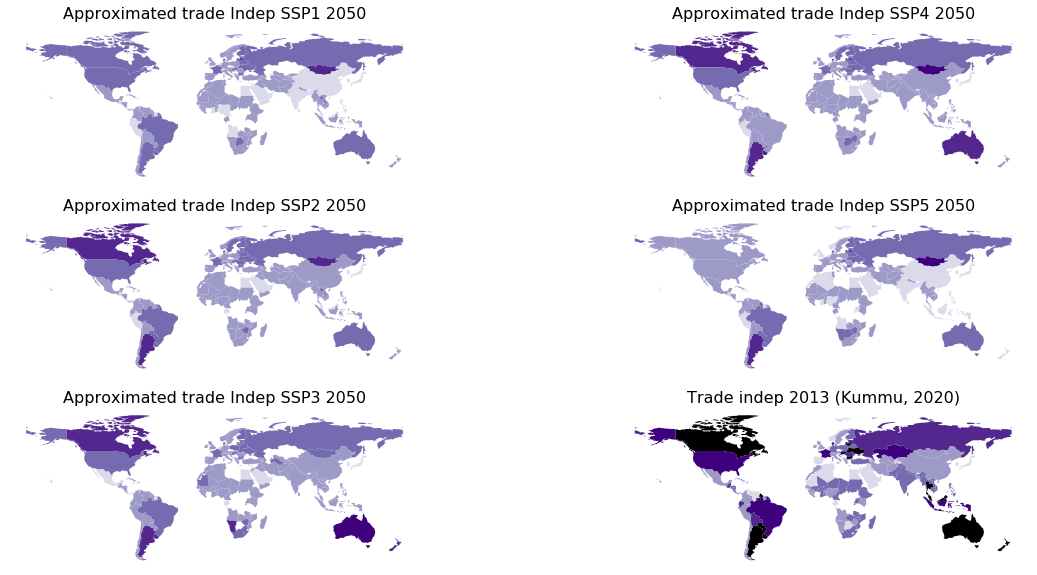

In [117]:
# Map predicted Trade 2050 and Trade 2013.

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(20, 10))

world.plot(column='Trade_lm_predicted_ssp1', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,0])#, edgecolor=’0.8')
axes[0,0].set_title('Approximated trade Indep SSP1 2050', fontdict={'fontsize':'16'});
axes[0,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp2', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,0])#, edgecolor=’0.8')
axes[1,0].set_title('Approximated trade Indep SSP2 2050', fontdict={'fontsize':'16'});
axes[1,0].axis('off');

world.plot(column='Trade_lm_predicted_ssp3', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,0])#, edgecolor=’0.8')
axes[2,0].set_title('Approximated trade Indep SSP3 2050', fontdict={'fontsize':'16'});
axes[2,0].axis('off');


world.plot(column='Trade_lm_predicted_ssp4', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[0,1])#, edgecolor=’0.8')
axes[0,1].set_title('Approximated trade Indep SSP4 2050', fontdict={'fontsize':'16'});
axes[0,1].axis('off');

world.plot(column='Trade_lm_predicted_ssp5', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[1,1])#, edgecolor=’0.8')
axes[1,1].set_title('Approximated trade Indep SSP5 2050', fontdict={'fontsize':'16'});
axes[1,1].axis('off');

world.plot(column='Trade_2013', cmap=cmap, norm=norm,  linewidth=0.8, ax=axes[2,1])#, edgecolor=’0.8')
axes[2,1].set_title('Trade indep 2013 (Kummu, 2020)', fontdict={'fontsize':'16'});
axes[2,1].axis('off');